In [86]:
import ast
import pandas as pd
import numpy as np
import plotly.graph_objects as go
import plotly.express as px
%config Completer.use_jedi = False

In [87]:
row = [0, 1] * 4
board = [row[::-1] if i%2 == 1 else row for i in range(1, 9)]
board

[[1, 0, 1, 0, 1, 0, 1, 0],
 [0, 1, 0, 1, 0, 1, 0, 1],
 [1, 0, 1, 0, 1, 0, 1, 0],
 [0, 1, 0, 1, 0, 1, 0, 1],
 [1, 0, 1, 0, 1, 0, 1, 0],
 [0, 1, 0, 1, 0, 1, 0, 1],
 [1, 0, 1, 0, 1, 0, 1, 0],
 [0, 1, 0, 1, 0, 1, 0, 1]]

In [102]:
# Read the .csv file with the preprocessed data.
df = pd.read_csv("chess_app.csv", dtype={"pawns": int, "knights": int, "bishops": int,
                                         "rooks": int, "queens": int},
                 converters={"wKing_sqr": ast.literal_eval, "bKing_sqr": ast.literal_eval})

In [88]:
def board_output(vector):

    brd = np.zeros((8, 8))
    for tup in vector:
        brd[tup] += 1

    return pd.DataFrame(brd)

In [104]:
df1 = board_output(df["bKing_sqr"])

In [283]:
print(df1)

       0      1      2      3       4      5       6      7
0  109.0  258.0  616.0  376.0  2494.0  650.0  4186.0  966.0
1   78.0  128.0  200.0  337.0   431.0  454.0   640.0  565.0
2   81.0   96.0  123.0  201.0   227.0  264.0   222.0  227.0
3   53.0   51.0   76.0   97.0   130.0  123.0   106.0  125.0
4   49.0   47.0   58.0   72.0    63.0  106.0   112.0   93.0
5   51.0   42.0   57.0   51.0    45.0   85.0    70.0   64.0
6   36.0   31.0   30.0   26.0    38.0   50.0    23.0   19.0
7   21.0   18.0   16.0   23.0    18.0   15.0    20.0   14.0


In [201]:
x_coords = ["A", "B", "C", "D", "E", "F", "G", "H"]
replacer = {i+1: x for i, x in enumerate(x_coords)}
replacer

{1: 'A', 2: 'B', 3: 'C', 4: 'D', 5: 'E', 6: 'F', 7: 'G', 8: 'H'}

In [202]:
df2 = df1.stack().reset_index().rename(columns={"level_0":"rows","level_1":"cols",0:"freq"})
df2.iloc[:,0:2] = df2.iloc[:,0:2].apply(lambda x:x+1)
df2["letters"] = df2.cols.replace(replacer)

In [203]:
df2

,rows,cols,freq,letters
0,1,1,109.0,A
1,1,2,258.0,B
2,1,3,616.0,C
3,1,4,376.0,D
4,1,5,2494.0,E
...,...,...,...,...
59,8,4,23.0,D
60,8,5,18.0,E
61,8,6,15.0,F
62,8,7,20.0,G


In [145]:
sorted(list(range(0, 8, 1)) * 4)

[0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 2,
 2,
 2,
 2,
 3,
 3,
 3,
 3,
 4,
 4,
 4,
 4,
 5,
 5,
 5,
 5,
 6,
 6,
 6,
 6,
 7,
 7,
 7,
 7]

In [159]:
sorted([i for i in range(0,8,1)] * 4)

[0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 2,
 2,
 2,
 2,
 3,
 3,
 3,
 3,
 4,
 4,
 4,
 4,
 5,
 5,
 5,
 5,
 6,
 6,
 6,
 6,
 7,
 7,
 7,
 7]

In [172]:
row = list(range(0,8,2))
x_black = []
for i in range(8):
    if (i % 2) == 0:
        x_black += list(range(0,8,2))
    else:
        x_black += list(range(1,8,2))
        
x_white = []
for i in range(8):
    if (i % 2) == 0:
        x_white += list(range(1,8,2))
    else:
        x_white += list(range(0,8,2))

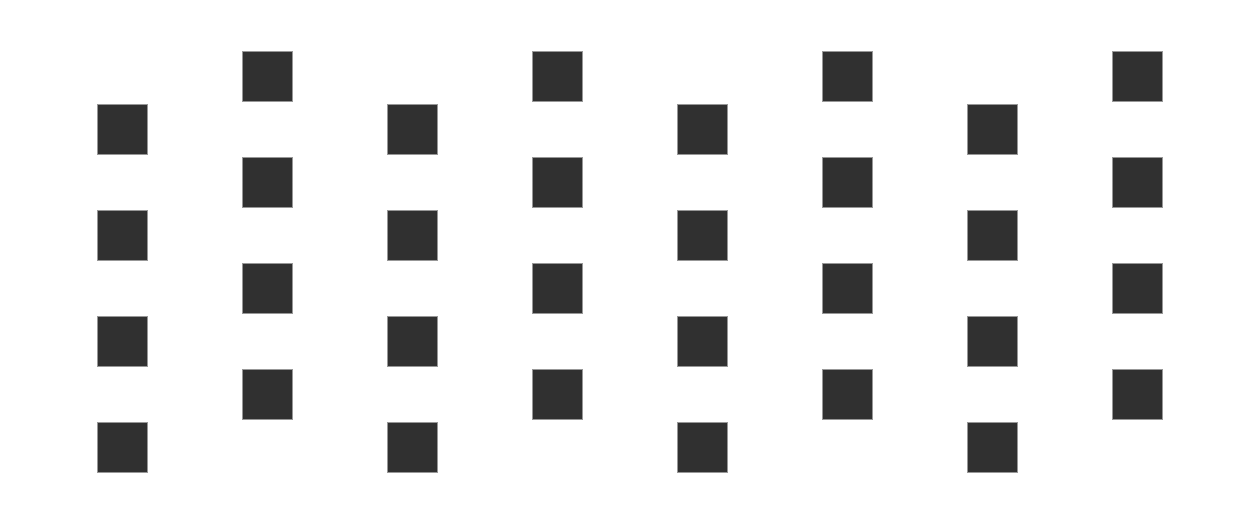

In [185]:
row = [0, 1] * 4
boardmatrix = [row[::-1] if i % 2 == 1 else row for i in range(1, 9)]
fig = go.Figure(
    layout=dict(
        margin=dict(l=50, r=50, t=50, b=50, pad=10),
        width=500,
        height=500,
        plot_bgcolor="rgba(0,0,0,0)",
        paper_bgcolor="rgba(0,0,0,0)",
        font_color="white",
        coloraxis_showscale=False,
        showlegend=False,
        yaxis=dict(range=[-0.5, 7.5], color="white", tickfont_size=12, fixedrange=True),
        xaxis=dict(range=[-0.5, 7.5], color="white", tickfont_size=12, fixedrange=True),
    )
)

fig.add_trace(
    go.Scatter(
        x0=0,
        y0=0,
        dx=0,
        x=x_black,
        y=sorted([i for i in range(0,8,1)] * 4),
        name="Chess Board",
        mode="markers",
        opacity=1,
        marker_symbol="square",
        marker_line_color="black",
        marker_size=50,
        marker_sizemode="diameter",
        marker_opacity=1,
        marker_color="#303030",
        hoverinfo="none",
    )
)

fig.add_trace(
    go.Scatter(
        x0=0,
        y0=0,
        dx=0,
        x=x_white,
        y=sorted([i for i in range(0,8,1)] * 4),
        name="Chess Board",
        mode="markers",
        opacity=1,
        marker_symbol="square",
        marker_size=50,
        marker_sizemode="diameter",
        marker_opacity=1,
        marker_color="white",
        hoverinfo="none",
    )
)

# return go.Heatmap(
# x=list(range(0, 8)),
# y=list(range(0, 8)),
# x0=0,
# y0=0,
# dx=0,
# z=boardmatrix,
# hoverinfo="none",
# name="Chess Board",
# colorscale=["white", "#303030"],
# showscale=False,
# )


fig.show(
    config={"displayModeBar": False, "scrollZoom": False, "showAxisDragHandles": False}
)

In [106]:
dict_results = {"Games": {"white": 500, "black": 250, "draw": 50}}

In [42]:
pd.DataFrame(dict_results).T

,black,draw,white
Games,250,50,500


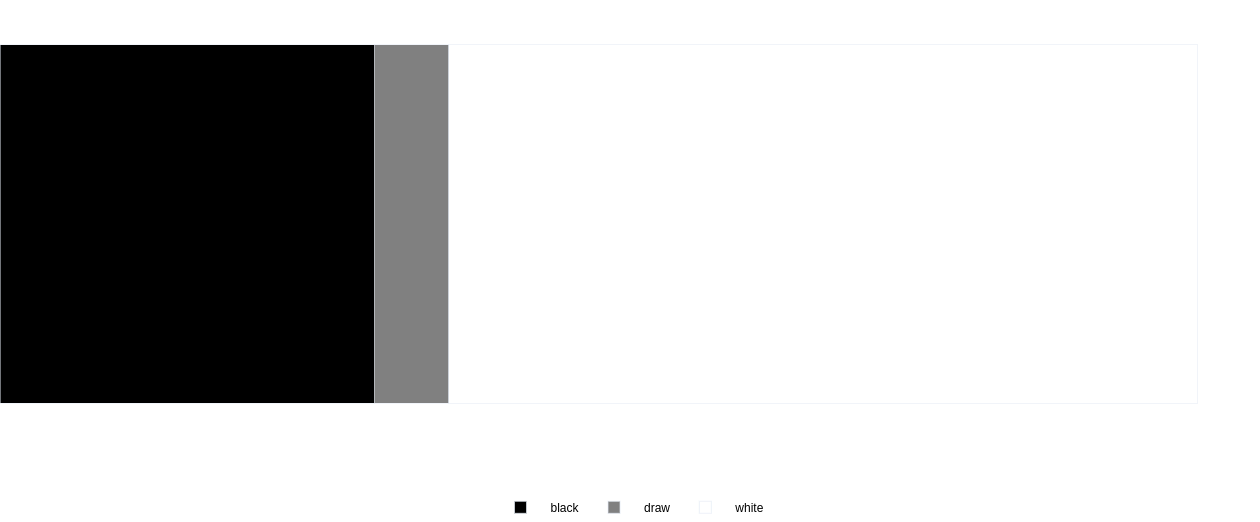

In [85]:
dict_results = {"Games": {"white": 500, "black": 250, "draw": 50}}
fig = px.bar(pd.DataFrame(dict_results).T, orientation="h", barmode="stack", color_discrete_map={"black": "black", "white": "white", "draw":"gray"})
margin = 0
fig.update_layout(
    xaxis_title="",
    yaxis_title="",
    xaxis_visible=False,
    yaxis_visible=False,
    plot_bgcolor="rgba(0,0,0,0)",
    paper_bgcolor="rgba(0,0,0,0)",
    legend_orientation="h",
    legend_itemwidth=50,
    legend_title="",
    legend_xanchor="auto",
    legend_x=0.5,
    margin=dict(l=margin, r=margin, t=margin, b=margin, pad=0),
    legend_font = dict(family="Arial", size=12, color="black"),
)
fig.show()